In [1]:
from UtilDatasetPrepFromLORE import *
from Rankers import *
from PreferentialSampling import *
from UniformSampling import *
from StandardEval import *
from FairnessEval import *
from Explainers import *

22-Feb-13 19:07:58 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


# ADULT

## Uniform Sampling

In [2]:
path_res = '/Users/Marta/FAccT/Res-ADULT/'
path_data = 'datasets/'
filename = 'adult.csv'
sensitive = ['sex'] #OR 'race','marital-status'
df = prepare_adult_dataset(filename, path_data, sensitive)
df

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,target,age,workclass,education,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,sex_Female,sex_Male
0,0,39,6,9,4,0,1,4,2174,0,40,38,0,1
1,0,50,5,9,2,3,0,4,0,0,13,38,0,1
2,0,38,3,11,0,5,1,4,0,0,40,38,0,1
3,0,53,3,1,2,5,0,2,0,0,40,38,0,1
4,0,28,3,9,2,9,5,2,0,0,40,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,27,3,7,2,12,5,4,0,0,38,38,1,0
32557,1,40,3,11,2,6,0,4,0,0,40,38,0,1
32558,0,58,3,11,6,0,4,4,0,0,40,38,1,0
32559,0,22,3,11,4,0,3,4,0,0,20,38,0,1


In [3]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['<=50K','>50K']
# dictionary={'<=50K': 0, '>50K': 1}
adClass=1
disClass=0
protected = ['sex_Female','sex_Male']#['race_Amer-Indian-Eskimo','race_Asian-Pac-Islander','race_Black','race_Other','race_White']
protected_feature='sexes'#'races' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr='sex_Male'
disAttr='sex_Female'

In [4]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [5]:
X_test = pd.DataFrame(X_test, columns=column_names)
X_test = X_test.sample(300)
y_test = y_test[X_test.index]
X_test = X_test.values

In [6]:
findFreq(target,protected,df)

({'sex_Female': 6721, 'sex_Male': 10592},
 {'sex_Female': 799, 'sex_Male': 4680})

In [7]:
df_new=UniformSampling(target,protected,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'sex_Female': 6721, 'sex_Male': 10592}
Counting labels = 1  {'sex_Female': 799, 'sex_Male': 4680}
DN  ('sex_Female', 6721)
FP  ('sex_Male', 4680)
DP  ('sex_Female', 799)
FN  ('sex_Male', 10592)
Len DN_df  6721
Len FP_df  4680
Len DP_df  799
Len FN_df  10592


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Len restData 0
DN_expected  5712
1009 to be removed
Len DN_df after sampling  5712
FP_expected  3671
1009 to be removed
Len FP_df after sampling  3671
DP_expected  1808
1009 to add
Len DP_df after sampling  1808
FN_expected  11601
1009 to add
Len FN_df after sampling  11601


In [8]:
findFreq(target,protected,df_new)

({'sex_Female': 5712, 'sex_Male': 11601},
 {'sex_Female': 1808, 'sex_Male': 3671})

In [9]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,False)

### MLP

In [10]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [11]:
clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 300


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 26 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 6 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 49 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 23 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 34 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 7 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 22 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 17 ]


,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.409091,0.412371,0.500000,0.421053,CLF Mitigated,0.003280,0.078947,0.090909,0.008681
Discrimination,0.077417,0.109220,0.035596,-0.046975,CLF Mitigated Blind,0.031803,0.082571,0.041821,0.156195


In [12]:
res = res.round(3)
res.to_csv(path_or_buf=path_res+'US_MLP_Performances.csv')
res

,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.409,0.412,0.500,0.421,CLF Mitigated,0.003,0.079,0.091,0.009
Discrimination,0.077,0.109,0.036,-0.047,CLF Mitigated Blind,0.032,0.083,0.042,0.156


In [13]:
PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [14]:
PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [15]:
res = pd.read_csv(path_res+'US_MLP_Performances.csv',index_col=0)
res.to_csv(path_res+'US_MLP_Performances.csv')
res

,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.409,0.412,0.500,0.421,CLF Mitigated,0.003,0.079,0.091,0.009
Discrimination,0.077,0.109,0.036,-0.047,CLF Mitigated Blind,0.032,0.083,0.042,0.156


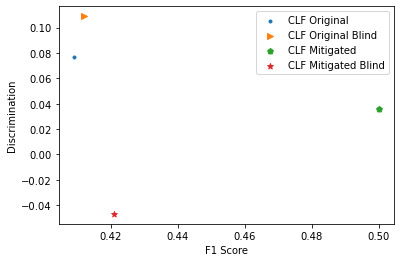

In [16]:
plotDisc(res)

In [17]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 106 instances.
    * "('sex_Male',)" grouping has 194 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 95 data points.
        - The class *>50K* has 11 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 149 data points.
        - The class *>50K* has 45 data points.


In [18]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:


{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

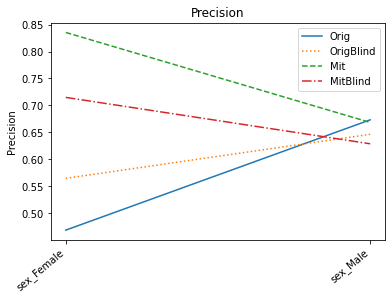

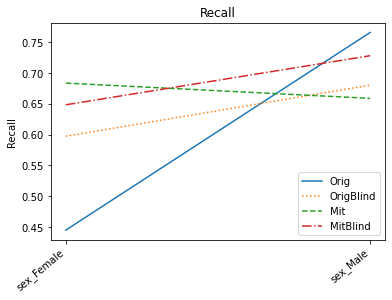

In [19]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [20]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [21]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [4]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [5]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

""


In [6]:
XAIMean

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
age,0.012401,0.019041,0.031903,0.013424
workclass,0.001924,0.002734,0.002983,0.002297
education,0.007419,0.013282,0.013493,0.005988
marital-status,0.009422,0.021269,0.062476,0.036163
occupation,0.004481,0.006686,0.005834,0.005515
relationship,0.009793,0.007411,0.049614,0.047351
race,0.001927,0.003608,0.003737,0.001762
capital-gain,0.081255,0.168628,0.072826,0.055661
capital-loss,0.025167,0.017642,0.020012,0.013593
hours-per-week,0.007433,0.013444,0.014488,0.007101


In [7]:
EValues = computeE(shap_v,column_names)
EValues 

,E
clfOrig-clfOrigBlind,0.014
clfMit-clfMitBlind,0.023
clfOrig-clfMit,0.024
clfOrigBlind-clfMitBlind,0.015


In [8]:
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Fix.csv')
resSHAP

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
SA-Sum,0.800,0.144,0.659,0.005
SA-Mean,0.007,0.006,0.013,0.001
NSA-Sum,14.762,15.522,16.020,14.143
NSA-Mean,0.021,0.016,0.019,0.025


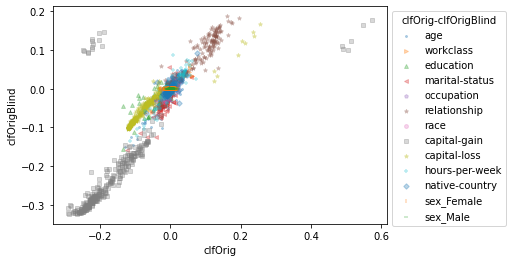

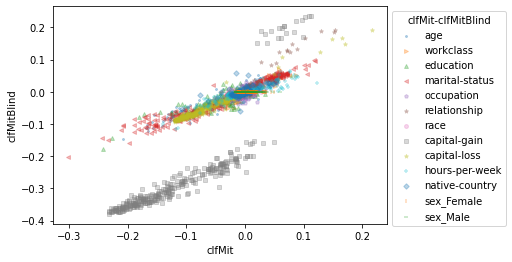

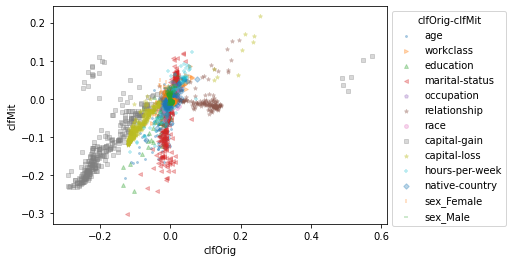

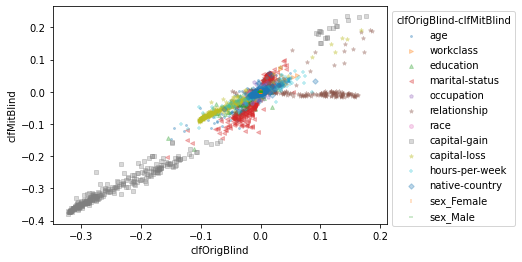

In [29]:
XAIPlots(shap_v,column_names,diffClfs=True)

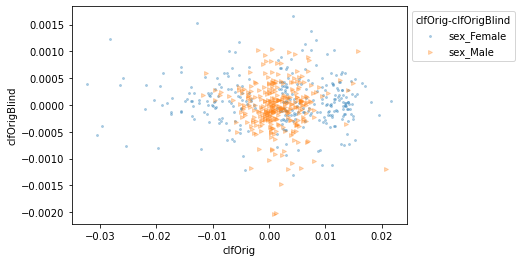

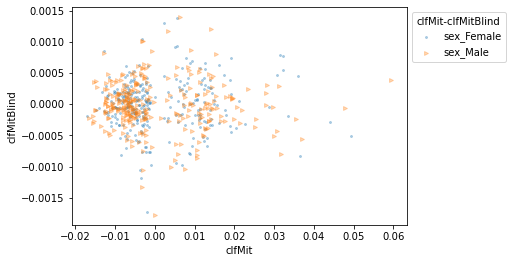

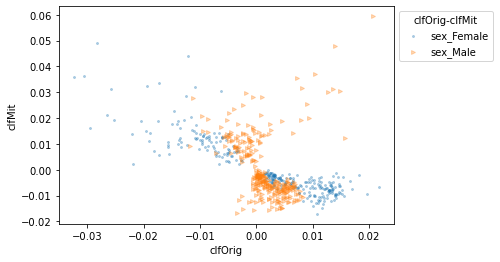

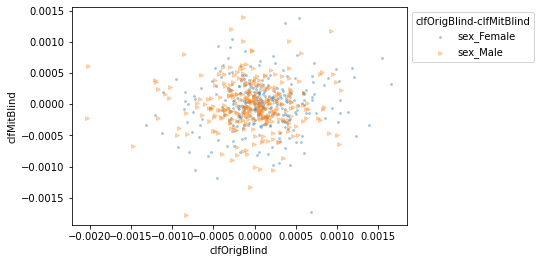

In [30]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Fix.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Change.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Change.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [ ]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [ ]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [ ]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

In [ ]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [31]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [32]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_RF_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 300
---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 27 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 0 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 7 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 13 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 29 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 0 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 8 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 12 ]


,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.506024,0.517647,0.342105,0.368421,CLF Original Blind,0.011623,0.026316,0.163919,0.149226
Discrimination,0.139175,0.149485,-0.086559,-0.071970,CLF Mitigated,0.010309,0.014589,0.225734,0.221455


In [33]:

PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [34]:
PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [35]:
res = pd.read_csv(path_res+'US_RF_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'US_RF_Performances.csv')
res

,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.506,0.518,0.342,0.368,CLF Original Blind,0.012,0.026,0.164,0.149
Discrimination,0.139,0.149,-0.087,-0.072,CLF Mitigated,0.010,0.015,0.226,0.221


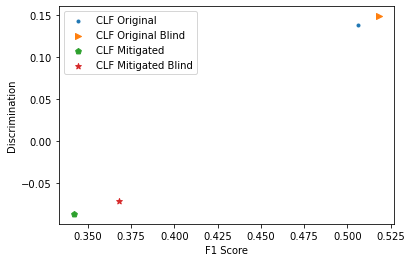

In [36]:
plotDisc(res)

In [37]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 106 instances.
    * "('sex_Male',)" grouping has 194 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 95 data points.
        - The class *>50K* has 11 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 149 data points.
        - The class *>50K* has 45 data points.


In [38]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:


{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


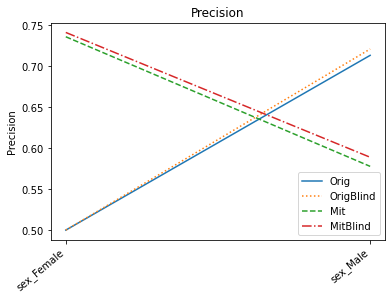

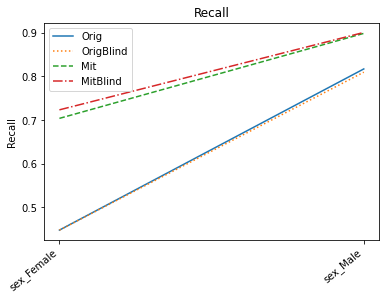

In [39]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [40]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [41]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [9]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [10]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

""


In [11]:
XAIMean

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
age,0.002865,0.002443,0.006217,0.006291
workclass,0.000620,0.000450,0.000706,0.000776
education,0.003891,0.003444,0.004367,0.004164
marital-status,0.005963,0.003508,0.013512,0.010046
occupation,0.003054,0.001949,0.004034,0.004634
relationship,0.003263,0.005360,0.043597,0.041933
race,0.000355,0.000471,0.000441,0.000408
capital-gain,0.002693,0.011745,0.009066,0.019915
capital-loss,0.005683,0.003126,0.002777,0.004388
hours-per-week,0.003561,0.003005,0.004732,0.005387


In [12]:
EValues = computeE(shap_v,column_names)
EValues 

,E
clfOrig-clfOrigBlind,0.004
clfMit-clfMitBlind,0.003
clfOrig-clfMit,0.008
clfOrigBlind-clfMitBlind,0.008


In [13]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix.csv')
resSHAP

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
SA-Sum,0.309,0.349,0.659,0.002
SA-Mean,0.007,0.002,0.009,0.000
NSA-Sum,15.646,15.025,15.062,15.598
NSA-Mean,0.004,0.002,0.008,0.008


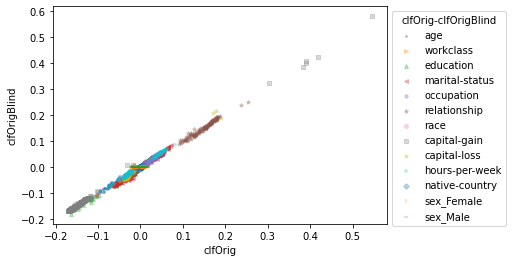

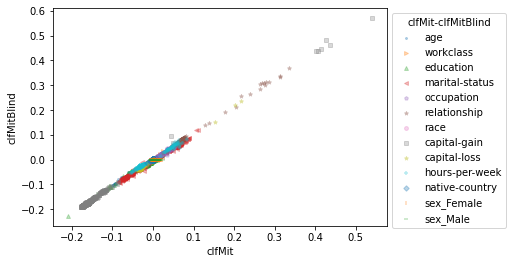

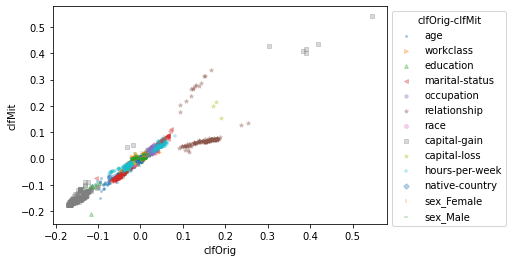

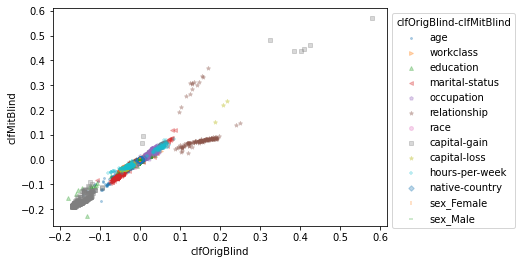

In [49]:
XAIPlots(shap_v,column_names,diffClfs=True)

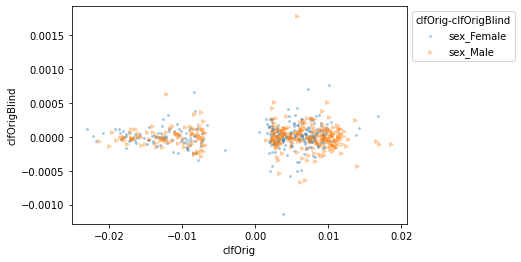

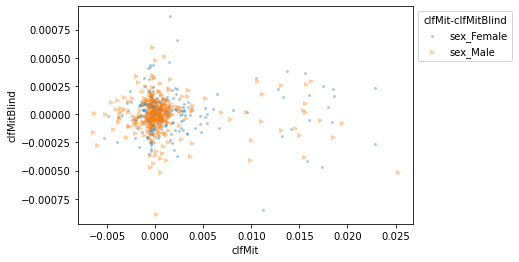

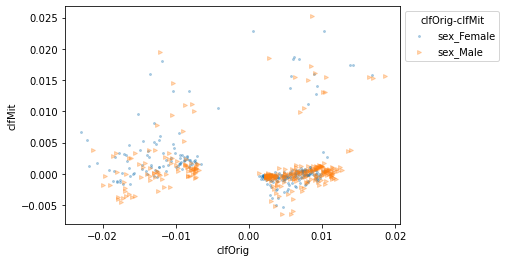

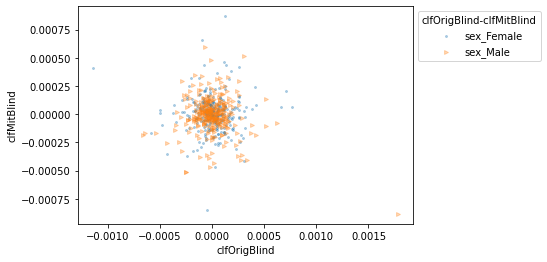

In [50]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix_Tree.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Fix.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change_Tree.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Change.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [ ]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [ ]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [ ]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [ ]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

In [ ]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

## Preferential Sampling

In [ ]:
path_res = '/Users/Marta/FAccT/Res-ADULT/'
path_data = 'datasets/'
filename = 'adult.csv'
sensitive = ['sex'] #OR 'race','marital-status'
df = prepare_adult_dataset(filename, path_data, sensitive)
df

In [ ]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['<=50K','>50K']
# dictionary={'<=50K': 0, '>50K': 1}
adClass=1
disClass=0
protected = ['sex_Female','sex_Male']#['race_Amer-Indian-Eskimo','race_Asian-Pac-Islander','race_Black','race_Other','race_White']
protected_feature='sexes'#'races' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr='sex_Male'
disAttr='sex_Female'

In [ ]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [51]:
X = X.sample(3000)
X_blind = X_blind.iloc[X.index]
Y = Y[X.index]

In [ ]:
X_test = pd.DataFrame(X_test, columns=column_names)
X_test = X_test.sample(300)
y_test = y_test[X_test.index]
X_test = X_test.values

In [52]:
blind,ranker = rankers(X,X_blind,Y)

Non-Blind Rankers
GaussianNB(var_smoothing=0.03511191734215131)
LogisticRegression(C=0.012742749857031334, penalty='l1', solver='liblinear')
RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       n_estimators=500)


The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=0.1, gamma=1, probability=True)
Non-Blind Rankers Evaluation


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

           Gaussian Naive Bayes  Calibrated Gaussian Naive Bayes  \
Accuracy               0.806333                         0.806333   
Precision              0.861730                         0.851921   
Recall                 0.205451                         0.208298   
F1 Score               0.330750                         0.333923   

           Logistic Regression  Calibrated Logistic Regression  Random Forest  \
Accuracy              0.809000                        0.802333       0.840333   
Precision             0.733936                        0.770940       0.844203   
Recall                0.292523                        0.228288       0.386707   
F1 Score              0.415510                        0.347640       0.528740   

           Calibrated Random Forest  Support Vector Classifier  \
Accuracy                   0.846000                   0.766333   
Precision                  0.762201                   0.000000   
Recall                     0.496484                   0

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=0.1, gamma=1, probability=True)
Blind Rankers Evaluation


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


           Blind Gaussian Naive Bayes  Blind Calibrated Gaussian Naive Bayes  \
Accuracy                     0.806333                               0.806333   
Precision                    0.861730                               0.851921   
Recall                       0.205451                               0.208298   
F1 Score                     0.330750                               0.333923   

           Blind Logistic Regression  Blind Calibrated Logistic Regression  \
Accuracy                    0.808667                              0.807333   
Precision                   0.726816                              0.798690   
Recall                      0.295380                              0.245390   
F1 Score                    0.418051                              0.369816   

           Blind Random Forest  Blind Calibrated Random Forest  \
Accuracy              0.842667                        0.845333   
Precision             0.832477                        0.757371   
Recall    

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [53]:

PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(ranker, f)

In [54]:
PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "rb") as f:
  ranker = pickle.load(f)

In [55]:
findFreq(target,protected,df)

({'sex_Female': 6721, 'sex_Male': 10592},
 {'sex_Female': 799, 'sex_Male': 4680})

In [56]:
df_new=PreferentialSampling(target,protected,ranker,blind,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'sex_Female': 6721, 'sex_Male': 10592}
Counting labels = 1  {'sex_Female': 799, 'sex_Male': 4680}
DN  ('sex_Female', 6721)
FP  ('sex_Male', 4680)
DP  ('sex_Female', 799)
FN  ('sex_Male', 10592)
Len DN_df  6721
Len FP_df  4680
Len DP_df  799
Len FN_df  10592
Len restData 0


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


DN_expected  5712
1009 to be removed
Len DN_df after sampling  5712
FP_expected  3671
1009 to be removed
Len FP_df after sampling  3671
DP_expected  1808
1009 to add
Len DP_df after sampling  1808
FN_expected  11601
1009 to add
Len FN_df after sampling  11601


In [57]:
findFreq(target,protected,df_new)

({'sex_Female': 5712, 'sex_Male': 11601},
 {'sex_Female': 1808, 'sex_Male': 3671})

In [58]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,True)

### MLP

In [59]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [60]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_MLP_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 300


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 48 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 16 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 17 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 23 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 51 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 10 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 16 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 21 ]


,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.483333,0.461538,0.354167,0.365591,CLF Original,0.021795,0.011425,0.129167,0.095947
Discrimination,0.096479,0.168547,-0.129352,-0.115639,CLF Mitigated,0.072068,0.013713,0.225832,0.284186


In [61]:

PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [62]:
PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [63]:
res = pd.read_csv(path_res+'PS_MLP_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'PS_MLP_Performances.csv')
res

,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.483,0.462,0.354,0.366,CLF Original,0.022,0.011,0.129,0.096
Discrimination,0.096,0.169,-0.129,-0.116,CLF Mitigated,0.072,0.014,0.226,0.284


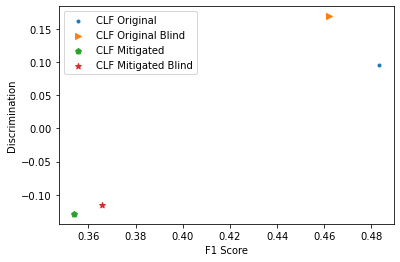

In [64]:
plotDisc(res)

In [65]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 106 instances.
    * "('sex_Male',)" grouping has 194 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 95 data points.
        - The class *>50K* has 11 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 149 data points.
        - The class *>50K* has 45 data points.


In [66]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:


{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

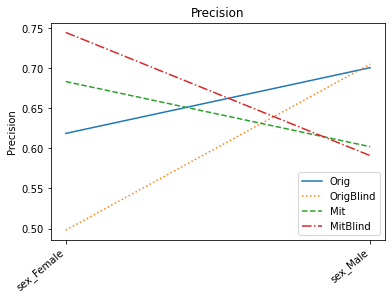

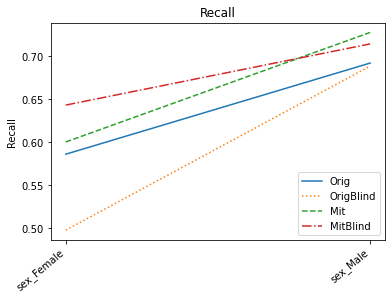

In [67]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [68]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [69]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [14]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [15]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

""


In [16]:
XAIMean

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
age,0.012401,0.016369,0.022606,0.015200
workclass,0.001991,0.003617,0.003952,0.002915
education,0.013674,0.013087,0.016158,0.012591
marital-status,0.014980,0.017490,0.029839,0.021312
occupation,0.006283,0.014078,0.012821,0.009470
relationship,0.023434,0.027721,0.026471,0.045605
race,0.001940,0.002149,0.002342,0.002095
capital-gain,0.037093,0.102324,0.056558,0.131007
capital-loss,0.010382,0.023331,0.039893,0.018027
hours-per-week,0.008374,0.011640,0.015673,0.013569


In [17]:
EValues = computeE(shap_v,column_names)
EValues 

,E
clfOrig-clfOrigBlind,0.011
clfMit-clfMitBlind,0.022
clfOrig-clfMit,0.022
clfOrigBlind-clfMitBlind,0.021


In [19]:
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Fix.csv')
resSHAP

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
SA-Sum,0.579,0.339,0.919,0.017
SA-Mean,0.006,0.024,0.031,0.001
NSA-Sum,16.817,16.089,17.457,15.640
NSA-Mean,0.015,0.023,0.024,0.016


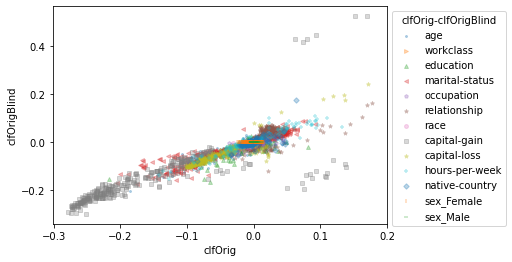

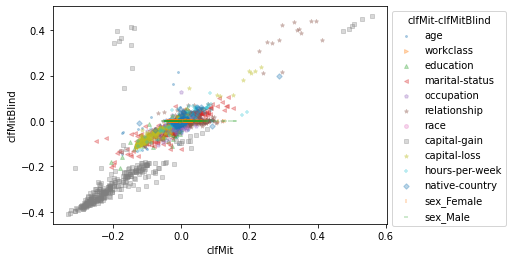

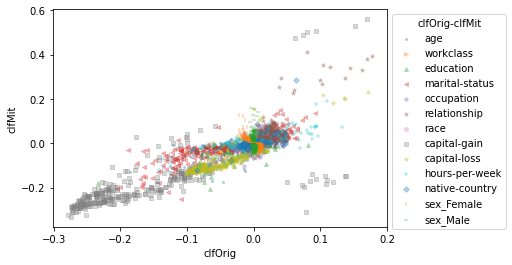

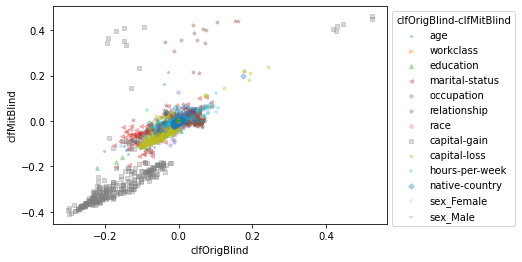

In [77]:
XAIPlots(shap_v,column_names,diffClfs=True)

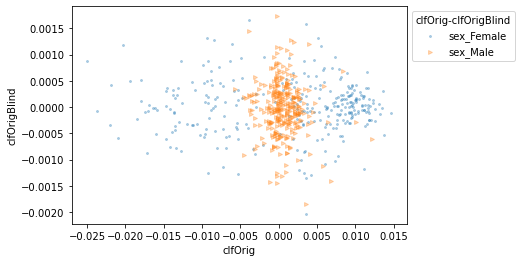

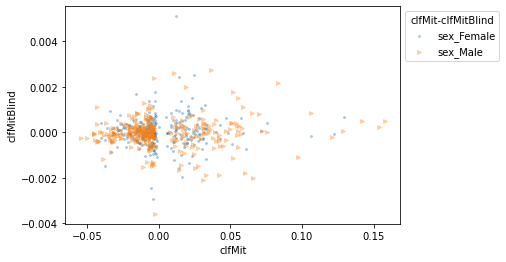

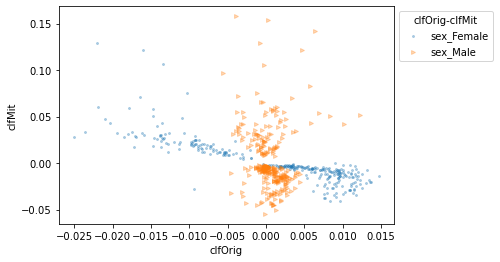

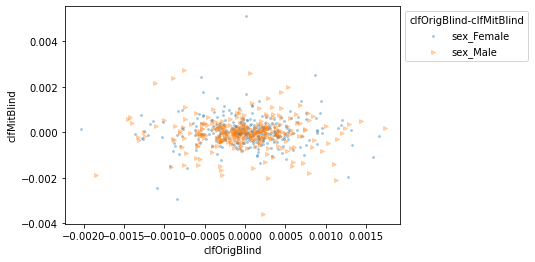

In [78]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Fix.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Change.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Change.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [ ]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [ ]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [ ]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

In [ ]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [79]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [80]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_RF_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 300
---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 28 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 0 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 7 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 16 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 28 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 0 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 194 ] Labeled as + class: [ 7 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 106 ] Labeled as + class: [ 15 ]


,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.50000,0.50000,0.354430,0.358974,CLF Original,0.0,0.004544,0.145570,0.141026
Discrimination,0.14433,0.14433,-0.114861,-0.105427,CLF Mitigated,0.0,0.009434,0.259191,0.249757


In [81]:

PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [82]:
PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [83]:
res = pd.read_csv(path_res+'PS_RF_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'PS_RF_Performances.csv')
res

,CLF Original,CLF Original Blind,CLF Mitigated,CLF Mitigated Blind,Best Score,Delta O-OB,Delta M-MB,Delta O-M,Delta OB-MB
F1 Score,0.500,0.500,0.354,0.359,CLF Original,0.0,0.005,0.146,0.141
Discrimination,0.144,0.144,-0.115,-0.105,CLF Mitigated,0.0,0.009,0.259,0.250


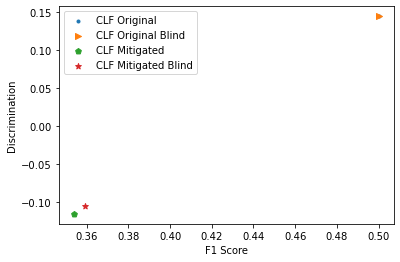

In [84]:
plotDisc(res)

In [85]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 106 instances.
    * "('sex_Male',)" grouping has 194 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 95 data points.
        - The class *>50K* has 11 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 149 data points.
        - The class *>50K* has 45 data points.


In [86]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:


{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


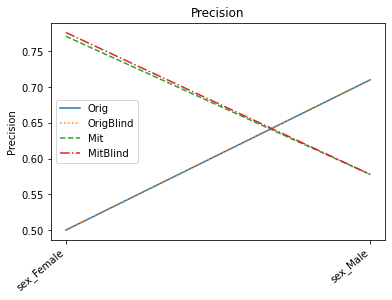

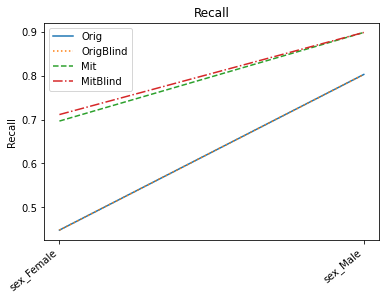

In [87]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [88]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [89]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [20]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [21]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

""


In [22]:
XAIMean

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
age,0.002824,0.006076,0.009334,0.011179
workclass,0.000565,0.000825,0.001173,0.001394
education,0.003294,0.002989,0.004127,0.005523
marital-status,0.006942,0.011009,0.016400,0.007391
occupation,0.001719,0.002735,0.008522,0.008095
relationship,0.004642,0.014903,0.041195,0.056381
race,0.000294,0.000410,0.000586,0.000465
capital-gain,0.014996,0.004312,0.022352,0.010670
capital-loss,0.003602,0.004224,0.005315,0.006273
hours-per-week,0.004034,0.006533,0.010871,0.010596


In [23]:
EValues = computeE(shap_v,column_names)
EValues 

,E
clfOrig-clfOrigBlind,0.005
clfMit-clfMitBlind,0.007
clfOrig-clfMit,0.014
clfOrigBlind-clfMitBlind,0.009


In [24]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix.csv')
resSHAP

,clfOrig-clfOrigBlind,clfMit-clfMitBlind,clfOrig-clfMit,clfOrigBlind-clfMitBlind
SA-Sum,0.224,1.876,2.101,0.001
SA-Mean,0.008,0.020,0.027,0.000
NSA-Sum,15.094,14.651,14.598,15.116
NSA-Mean,0.004,0.005,0.011,0.012


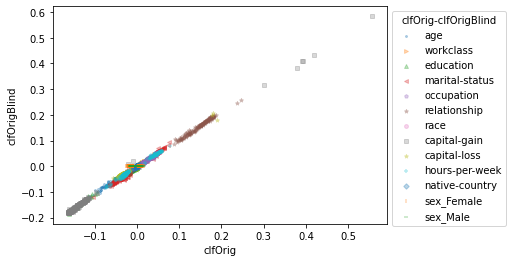

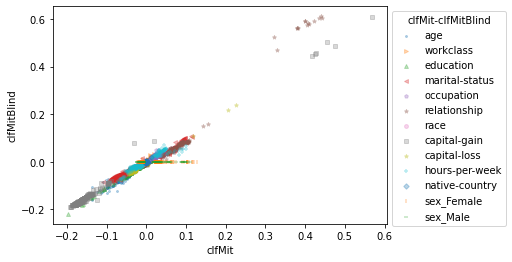

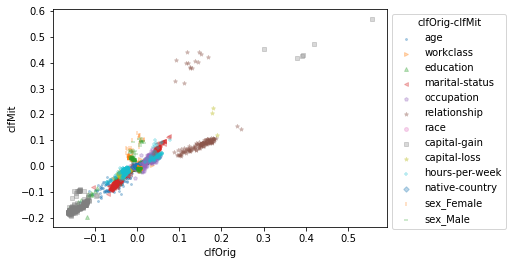

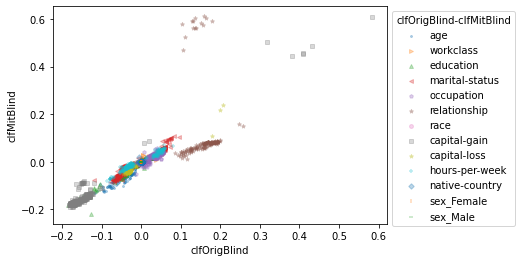

In [97]:
XAIPlots(shap_v,column_names,diffClfs=True)

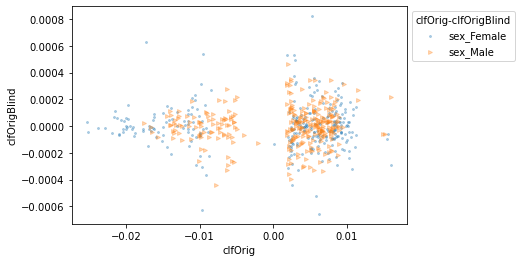

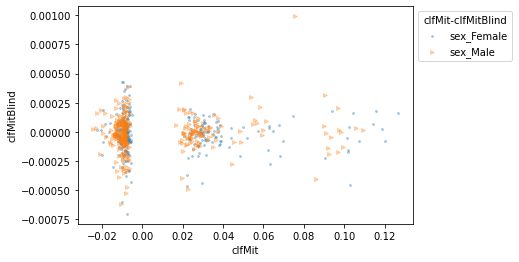

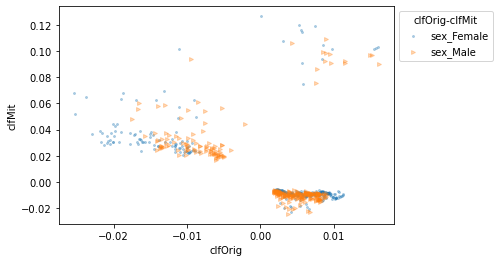

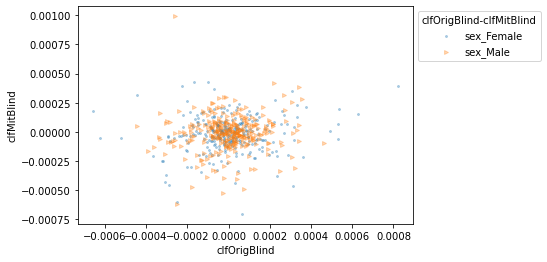

In [98]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix_Tree.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Fix.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [ ]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [ ]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(shap_v,column_names)
EValues 

In [ ]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change_Tree.csv')
resSHAP

In [ ]:
XAIPlots(shap_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [ ]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [ ]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [ ]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

In [ ]:
XAIMean

In [ ]:
EValues = computeE(lime_v,column_names)
EValues 

In [ ]:
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Change.csv')
resLIME

In [ ]:
XAIPlots(lime_v,column_names,diffClfs=True)

In [ ]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [ ]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [ ]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [ ]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

In [ ]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [ ]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [ ]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [ ]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

In [ ]:
XAIMean

In [ ]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

In [ ]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)